# **GRAIL Workshop**

> ## <font color='#8735fb'> cuGraph and RAPIDS example </font>

When we load the dataframe into cuDF we are now using a GPU dataframe

In [1]:
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import cudf
import cugraph
import cuml
import numpy as np

# import the data we saved in our other notebook
df = pd.read_pickle('wsi_dfx')

#create a cuda dataframe from the pandas one
cdf = cudf.from_pandas(df)

cdf.head

<bound method DataFrame.head of         latent var 0  latent var 1  latent var 2  latent var 3  latent var 4  \
0          -0.480657     -0.169395     -0.095828     -0.085959     -0.094398   
1           0.933378     -0.144760      0.092078      0.177704     -0.217735   
2          -0.663369     -0.699256     -0.128690     -0.037284      0.081769   
3           0.108706      0.023725     -0.011027      0.186186      0.061273   
4           0.072811     -0.485411     -0.259340      0.370064      0.200746   
...              ...           ...           ...           ...           ...   
390395      0.335671      0.055234     -0.009112      0.312863      0.117605   
390396      0.478405      0.035772      0.019463     -0.143907     -0.092569   
390397     -0.429628      0.143872      0.134062      0.330038      0.173430   
390398     -0.009195      0.484159     -0.652959     -0.684618     -0.094380   
390399     -0.261520      0.159705      0.056709      1.448384     -0.047682   

       

In [2]:
# get some stats on the data
cdf.describe()

,latent var 0,latent var 1,latent var 2,latent var 3,latent var 4,latent var 5,latent var 6,latent var 7,latent var 8,latent var 9,...,latent var 24,latent var 25,latent var 26,latent var 27,latent var 28,latent var 29,latent var 30,latent var 31,x,y
count,390400.000000,390400.000000,390400.000000,390400.000000,390400.000000,390400.000000,390400.000000,390400.000000,390400.000000,390400.000000,...,390400.000000,390400.000000,390400.000000,390400.000000,390400.000000,390400.000000,390400.000000,390400.000000,390400.000000,390400.000000
mean,-0.037080,0.015889,-0.002823,0.032427,0.064540,-0.002439,0.073943,-0.033200,-0.007899,-0.024662,...,-0.142507,0.017255,-0.067501,-0.001857,0.038345,0.118018,0.051641,-0.054400,44242.859016,78441.344262
std,0.652385,0.603731,0.275533,0.671171,0.575646,0.185525,0.799454,0.125074,0.148761,0.647367,...,0.790459,0.180821,0.267340,0.578818,0.637257,1.113412,0.172590,0.161720,19739.607012,29741.880019
min,-3.709008,-3.258913,-1.580128,-5.299448,-3.841340,-1.094500,-6.058390,-0.784948,-0.825424,-3.295610,...,-6.026602,-1.097364,-2.350631,-3.483624,-3.186929,-3.263930,-0.743470,-1.871211,0.000000,2560.000000
25%,-0.438749,-0.313571,-0.146882,-0.372681,-0.228307,-0.097094,-0.424715,-0.124936,-0.082460,-0.420048,...,-0.628592,-0.075495,-0.246927,-0.297245,-0.337462,-0.687512,-0.059661,-0.161856,28160.000000,48640.000000
50%,-0.038251,0.026707,0.018642,0.034633,0.115766,0.012249,0.067110,-0.043677,-0.016698,-0.040874,...,-0.132000,0.024445,-0.096628,0.014639,0.045384,0.325755,0.056474,-0.046743,46080.000000,94720.000000
75%,0.358908,0.350790,0.140693,0.439088,0.371186,0.091512,0.570940,0.049801,0.070792,0.371908,...,0.352447,0.110867,0.099754,0.306813,0.420646,0.934784,0.166595,0.050314,61440.000000,107520.000000
max,4.020405,3.112346,1.563918,4.002989,2.766290,1.088169,5.832603,0.550730,0.810067,3.757714,...,5.481096,1.206879,1.285506,2.784033,2.997560,5.825724,1.800359,0.636811,79360.000000,125440.000000


We can find the principle components of these feature vectors

In [3]:
# get the column names
feat_cols = cdf.columns

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols[0:32]].values)
pca_df = pd.DataFrame(pca_result,columns=["pca-1", "pca-2", "pca-3"])

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print(pca_df)

Explained variation per principal component: [0.16031662 0.07810047 0.07316772]
           pca-1     pca-2     pca-3
0      -0.696379  0.141482  0.360637
1      -0.859409 -0.454866 -0.292800
2      -0.401770 -0.724392 -0.490704
3      -1.668308  0.365484  1.140965
4       1.357575  0.979466  0.480051
...          ...       ...       ...
390395 -1.919545  0.199426  0.373359
390396  0.838427  0.363104 -0.338584
390397 -1.749652 -0.397035  0.333459
390398  1.428957  0.212440 -1.516808
390399 -1.476325  0.812019  0.132861

[390400 rows x 3 columns]


Another great visualisation tool is a confusion matrix with heatmap, which shows the correlation between the features

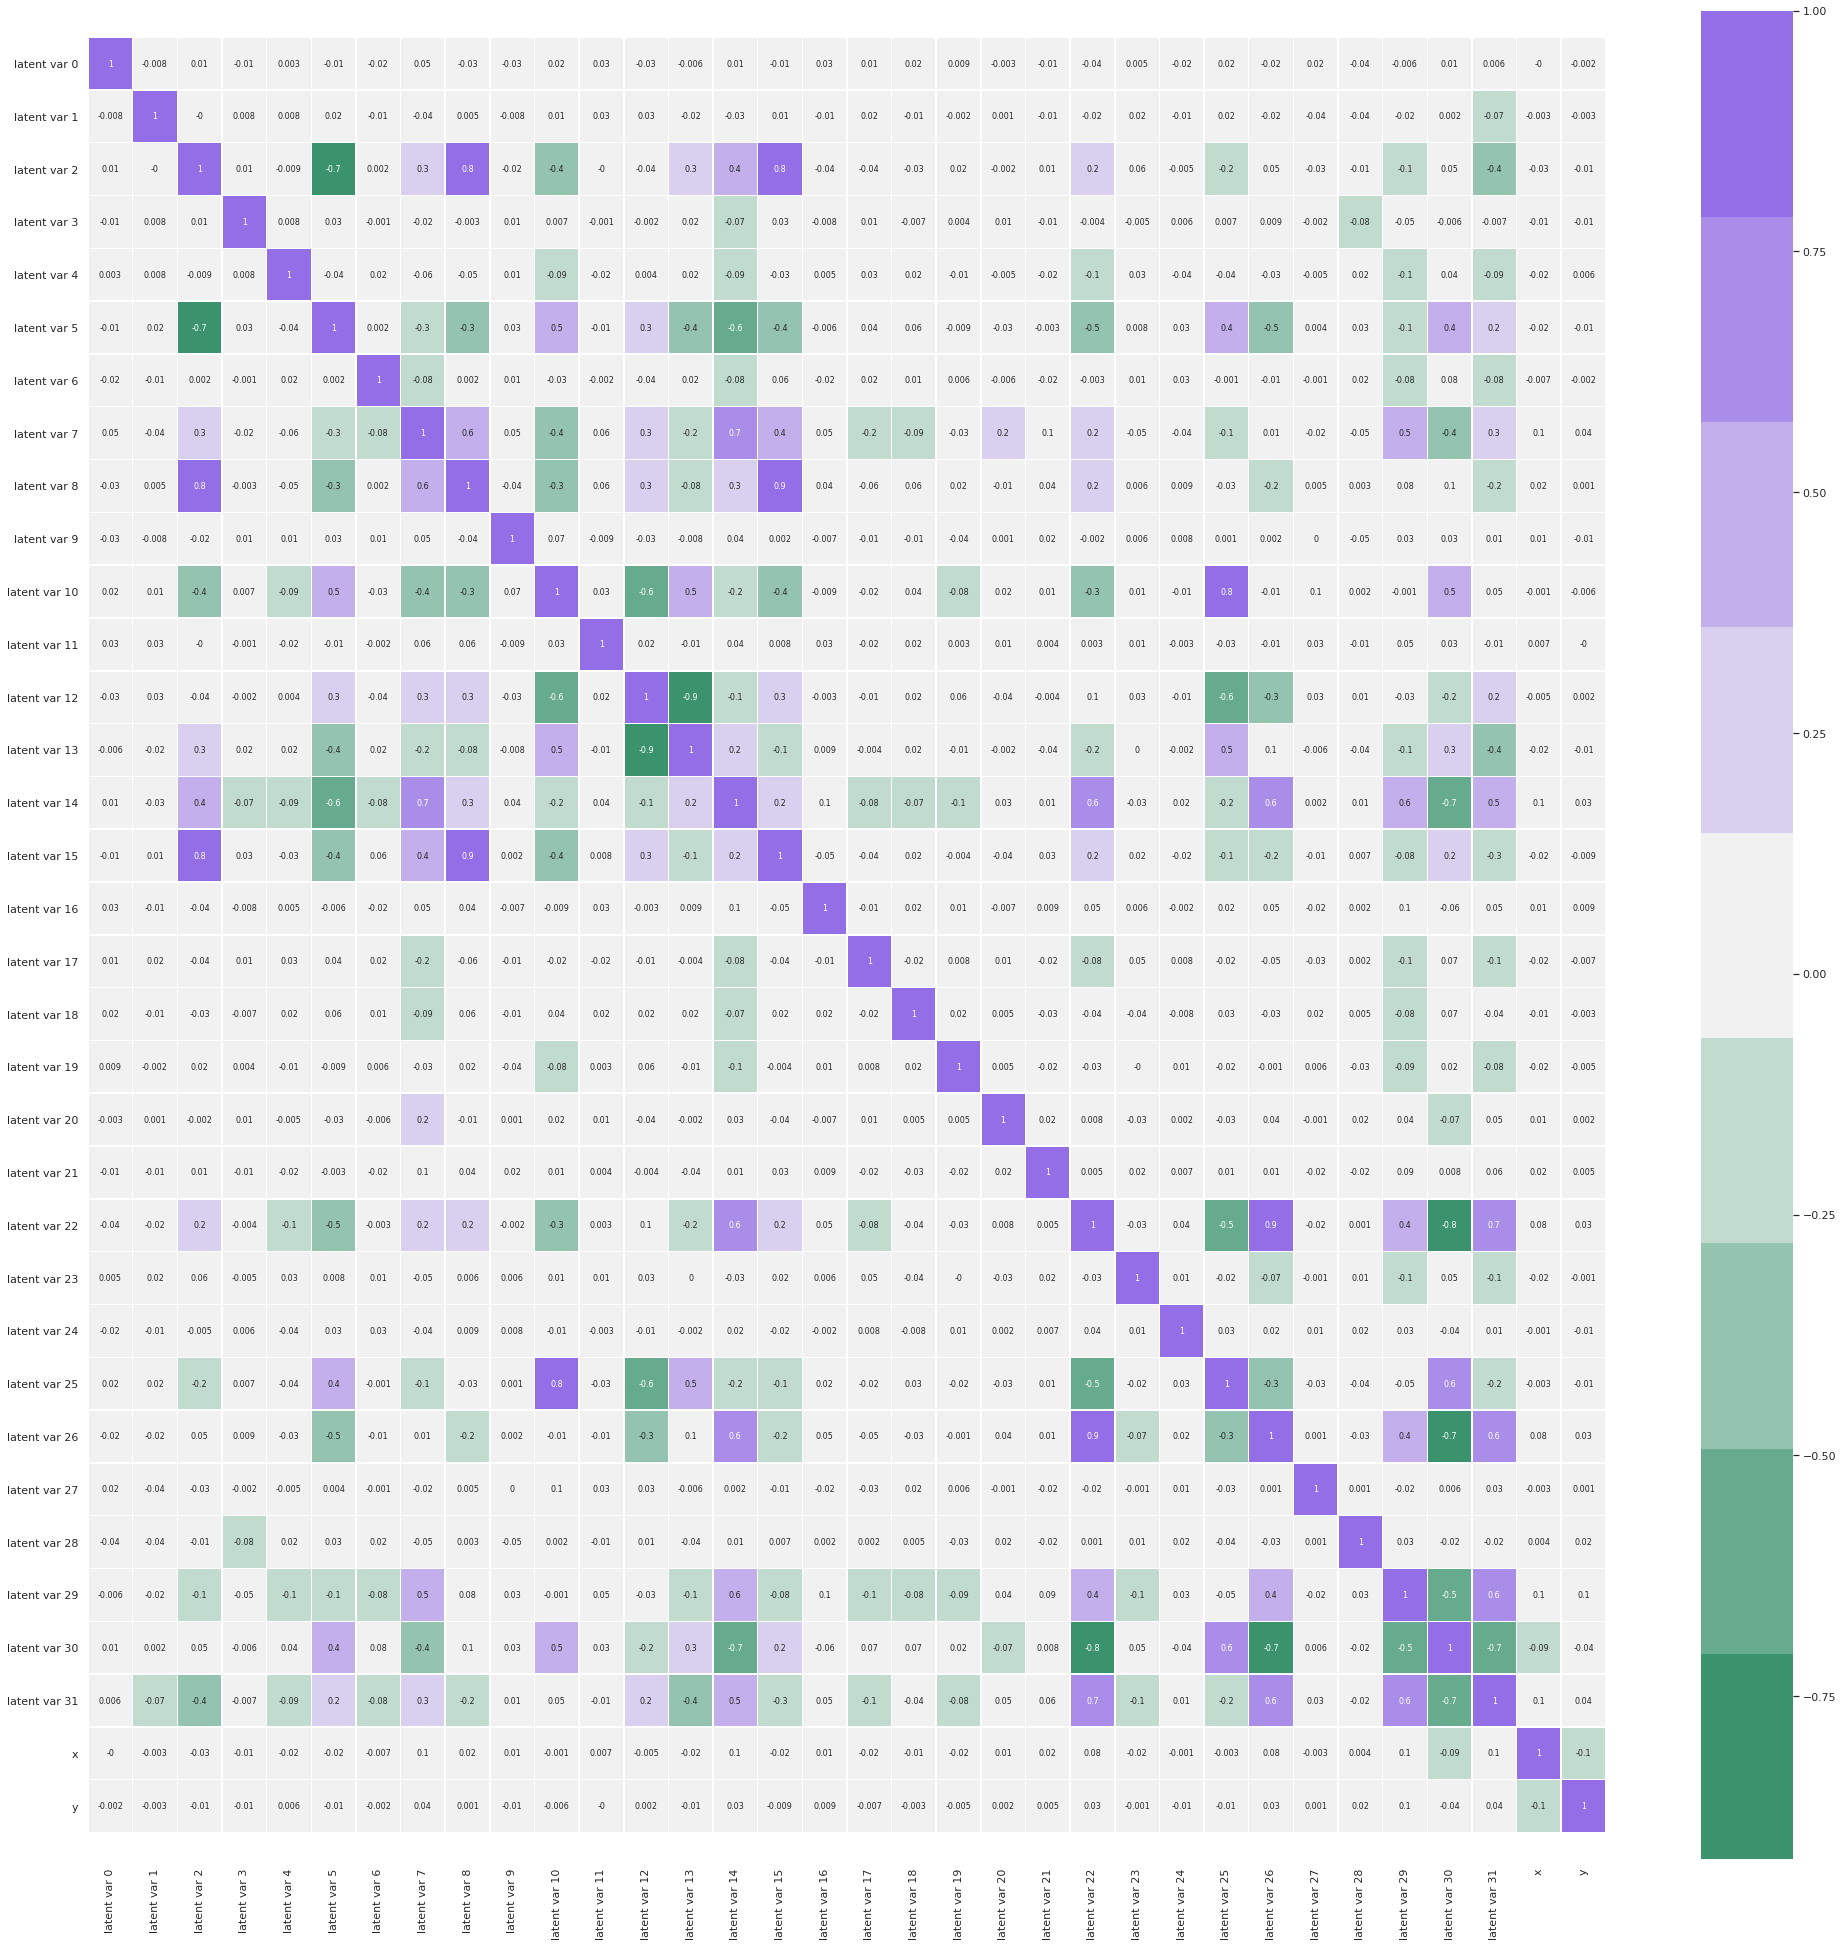

In [4]:
figsize = (34,34)
sns.set(rc={'figure.figsize':figsize}, style = 'white')

data_corr = df.corr()
ax =sns.heatmap(data=round(data_corr,3),
    cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9), annot=True,fmt='.1g', linewidth = .5,annot_kws={"size":8})
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b,t)
plt.show()

del(data_corr)

We can also plot the Principle Components in a scatter plot. You will see that we are using Numba as the means of getting the numpy array into a cuda dataframe.

In [5]:
# numba is a gpu and cpy accelerated package
import numba
from cuxfilter import DataFrame as fdf
from cuxfilter.charts import scatter

nba = numba.cuda.to_device(np.ascontiguousarray(pca_result))
cdf_pca = cudf.DataFrame(nba, columns=["pca-1", "pca-2", "pca-3"])

cuxdf = fdf.from_dataframe(cdf_pca)
scatter_chart = scatter(x="pca-1", y="pca-3", pixel_shade_type="linear")

d = cuxdf.dashboard([scatter_chart])
scatter_chart.view()


Column(sizing_mode='scale_both', width=800)
    [0] Bokeh(Figure)

There are other types of plot we can do, including 3D plots

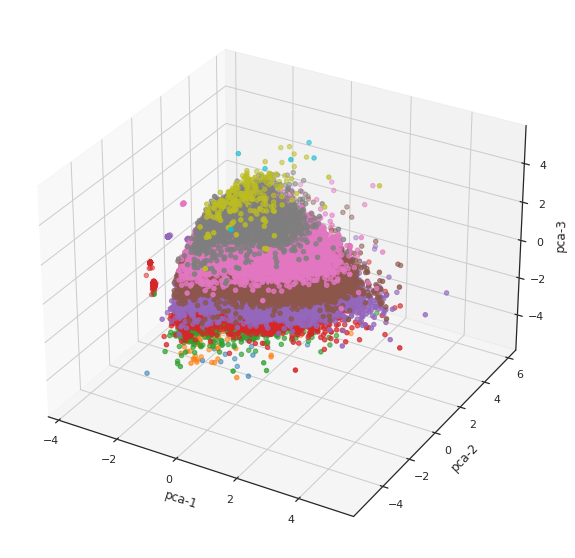

In [6]:
rndperm = np.random.permutation(pca_df.shape[0])

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_df.loc[rndperm,:]["pca-1"], 
    ys=pca_df.loc[rndperm,:]["pca-2"], 
    zs=pca_df.loc[rndperm,:]["pca-3"], 
    c=pca_df.loc[rndperm,:]["pca-3"], 
    cmap='tab10'
)
ax.set_xlabel('pca-1')
ax.set_ylabel('pca-2')
ax.set_zlabel('pca-3')
plt.show()

In order to turn the data we have into some sort of graph, we can use the nearest neighbour algorithm in cuML to find the nearest neighbours in feature space.
With around 0.5 million items, each with 32 features, finding the 5 nearest neighbours is a sizeable computation. 

In [7]:
from cuml.neighbors import NearestNeighbors as cuNN

knn_cuml = cuNN()
no_xy=cdf[feat_cols[0:32]]
knn_cuml.fit(no_xy)

%time D_cuml, I_cuml = knn_cuml.kneighbors(no_xy, 5)
I_cuml

CPU times: user 2.33 s, sys: 1.18 s, total: 3.51 s
Wall time: 3.49 s


,0,1,2,3,4
0,0,175020,144073,65297,83094
1,1,143667,385072,85393,352708
2,2,124827,179982,98340,213230
3,3,105945,51321,210521,148468
4,4,366781,169394,322885,203121
...,...,...,...,...,...
390395,390395,347170,341578,167343,286512
390396,390396,215884,147950,378478,205368
390397,390397,173757,239470,311375,345912
390398,390398,116587,217429,298669,290381


If you want to compare this with the sklearn CPU implementation be aware that it can take many minutes to run. It is not necessary for this notebook.

In [ ]:
# Only run this and the following cell to compare with CPU version
from sklearn.neighbors import NearestNeighbors as skNN

df_1=df[feat_cols[:32]]
knn_sk = skNN(algorithm='brute',n_jobs=1)
knn_sk.fit(df_1)

%time D_sk, I_sk = knn_sk.kneighbors(df_1, 5)
I_sk

In order to convert the output of the KNN operation into a graph, we need to prepare the data. Firstly we combine the nearest neighbour indexes and distances into one dataframe and give them unique column names

In [8]:
#give the columns names because they have to be unique in the merged dataframe
I_cuml.columns=['ix1','n1','n2','n3','n4']
D_cuml.columns=['ix2','d1','d2','d3','d4']
all_cols = cudf.concat([I_cuml, D_cuml],axis=1)
all_cols

,ix1,n1,n2,n3,n4,ix2,d1,d2,d3,d4
0,0,175020,144073,65297,83094,0.0,0.465489,0.509678,0.514424,0.523389
1,1,143667,385072,85393,352708,0.0,0.816239,0.864751,0.870340,0.888696
2,2,124827,179982,98340,213230,0.0,0.855851,0.896525,0.927246,0.954334
3,3,105945,51321,210521,148468,0.0,0.295168,0.306988,0.323186,0.361596
4,4,366781,169394,322885,203121,0.0,1.871673,1.902235,1.979508,2.007500
...,...,...,...,...,...,...,...,...,...,...
390395,390395,347170,341578,167343,286512,0.0,0.285919,0.302665,0.311166,0.353002
390396,390396,215884,147950,378478,205368,0.0,1.314256,1.340696,1.368237,1.395870
390397,390397,173757,239470,311375,345912,0.0,0.320935,0.324963,0.356392,0.360839
390398,390398,116587,217429,298669,290381,0.0,1.948045,1.963578,2.011706,2.104504


cuGraph expects a list of edges, each with its source and target and, optionally, the strength of the connection between them. So, we need to split each nearest neighbour column into separate edges in a new dataframe.

In [9]:
# Reformat the data to match the way edges are defined in cuGraph
c1 = all_cols[['ix1','n1','d1']]
c1.columns=['source','target','weight']
c2 = all_cols[['ix1','n2','d2']]
c2.columns=['source','target','weight']
c3 = all_cols[['ix1','n3','d3']]
c3.columns=['source','target','weight']
c4 = all_cols[['ix1','n4','d4']]
#c4 = all.iloc[:,[0, 4, 9]]
c4.columns=['source','target','weight']
                 
edges = [c1,c2,c3,c4]

edge_df = cudf.concat(edges)

del(all_cols)

edge_df = edge_df.reset_index()
edge_df = edge_df[['source','target','weight']]
edge_df

,source,target,weight
0,0,175020,0.465489
1,1,143667,0.816239
2,2,124827,0.855851
3,3,105945,0.295168
4,4,366781,1.871673
...,...,...,...
1561595,390395,286512,0.353002
1561596,390396,205368,1.395870
1561597,390397,345912,0.360839
1561598,390398,290381,2.104504


This dataframe is now used to generate the graph

In [10]:
#now we can actually create a graoh!!
G = cugraph.Graph()

G.from_cudf_edgelist(edge_df,source='source', destination='target', edge_attr='weight', renumber=True)

Once we have the graph we can do standard graph analytical operations

In [11]:
#now we can do some graph things
count = cugraph.triangles(G)
print("No of triangles = " + str(count))

coreno = cugraph.core_number(G)
print("Core Number = " + str(coreno))

No of triangles = 679215
Core Number =         core_number  vertex
0                 4    1216
1                 4    1217
2                 4    1218
3                 4    1219
4                 4    1220
...             ...     ...
390395            4  386363
390396            4  386364
390397            4  386365
390398            4  386366
390399            4  386367

[390400 rows x 2 columns]


cugraph is also able to use the force_atlas2 algorithm to generate a layout for the graph, which can allow us to visualise it. This algorithm uses a physics-based approach, treating the weights between the nodes as springs. The output is a new dataframe with the x and y coordinates of each node, which can then be fed into a visualiser.

In [12]:
nodes_ = cugraph.layout.force_atlas2(G, max_iter=500,
                strong_gravity_mode=False,
                outbound_attraction_distribution=True,
                lin_log_mode=False,
                barnes_hut_theta=0.5, verbose=True)
nodes_

,x,y,vertex
0,-9552.541016,2886.683105,24064
1,-4396.850098,-4111.323242,24065
2,-4235.113770,5431.594238,24066
3,-6975.193848,1000.466125,24067
4,-12066.072266,5438.530762,24068
...,...,...,...
390395,-9873.931641,5815.056641,386363
390396,5131.188965,-5894.204590,386364
390397,-536.940613,2279.644775,386365
390398,9655.674805,-3511.762451,386366


Finally we use cuXFilter to render the whole graph!

Column(sizing_mode='scale_both', width=800)
    [0] Bokeh(Figure)
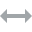
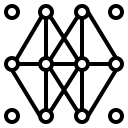

In [13]:
import cuxfilter.charts as cfc
import cuxfilter.layouts as clo

cux_df = fdf.load_graph((nodes_, edge_df))

chart0 = cfc.graph(edge_color_palette=['gray', 'black'],
                                            timeout=200, 
                                            node_aggregate_fn='mean', node_pixel_shade_type='linear',
                                            edge_render_type='direct',#other option available -> 'curved'
                                            edge_transparency=0.5
                                          )
d = cux_df.dashboard([chart0], layout=clo.double_feature)

# draw the graph
chart0.view()